In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import gzip
import scipy
import statsmodels


In [9]:
v2R_df = pd.read_csv('v2R_all_exp_all_reps_com_and_norm.csv.gz', sep=',', index_col=0)


In [10]:
v2R_df_over50 = v2R_df.loc[(v2R_df['cmpd34_min_cells'] > 50) & \
                                  (v2R_df['ctrls_min_cells'] > 50) & \
                                 (v2R_df['Tol_min_cells'] > 50) & \
                                 (v2R_df['27_min_cells'] > 50)].copy()
print (len(v2R_df_over50))

6716


In [11]:
v2R_df_over50_missense = v2R_df_over50.loc[(v2R_df_over50['syn_WT'] == False) & (v2R_df_over50['stop'] == False)].copy()


(0.7392544480740401, 0.0)


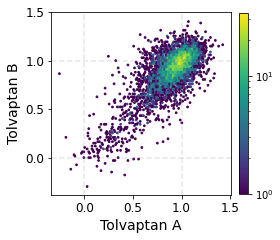

In [12]:
plt.figure(figsize=(4, 4))
plt.hexbin(v2R_df_over50_missense['TolA_norm_score'], v2R_df_over50_missense['TolB_norm_score'], bins='log')
plt.axhline(y=0, color='gray', linestyle='dashed', alpha=0.2)
plt.axhline(y=1, color='gray', linestyle='dashed', alpha=0.2)
plt.axvline(x=0, color='gray', linestyle='dashed', alpha=0.2)
plt.axvline(x=1, color='gray', linestyle='dashed', alpha=0.2)
plt.xticks([0, 0.5, 1, 1.5], fontsize=12)
plt.yticks([0, 0.5, 1, 1.5], fontsize=12)
plt.xlabel('Tolvaptan A', fontsize=14)
plt.ylabel('Tolvaptan B', fontsize=14)

print (scipy.stats.pearsonr(v2R_df_over50_missense['TolA_norm_score'], v2R_df_over50_missense['TolB_norm_score']))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.colorbar(fraction=0.046, pad=0.04)


plt.tight_layout()

(0.9079593497683685, 0.0)


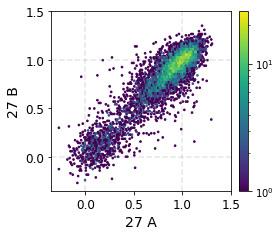

In [13]:
plt.figure(figsize=(4, 4))
plt.hexbin(v2R_df_over50_missense['27A_norm_score'], v2R_df_over50_missense['27B_norm_score'], bins='log')
plt.axhline(y=0, color='gray', linestyle='dashed', alpha=0.2)
plt.axhline(y=1, color='gray', linestyle='dashed', alpha=0.2)
plt.axvline(x=0, color='gray', linestyle='dashed', alpha=0.2)
plt.axvline(x=1, color='gray', linestyle='dashed', alpha=0.2)
plt.xticks([0, 0.5, 1, 1.5], fontsize=12)
plt.yticks([0, 0.5, 1, 1.5], fontsize=12)
plt.xlabel('27 A', fontsize=14)
plt.ylabel('27 B', fontsize=14)

print (scipy.stats.pearsonr(v2R_df_over50_missense['27A_norm_score'], v2R_df_over50_missense['27B_norm_score']))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.colorbar(fraction=0.046, pad=0.04)


plt.tight_layout()

/Users/tmighell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/tmighell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


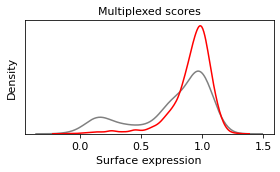

In [14]:
plt.figure(figsize=(4, 2.5))
#plt.hist(hydro_corr_list, color='lightgray', edgecolor='k', bins=16)

sns.distplot(v2R_df_over50_missense['ctrls_comb'], hist=False, color='gray')
sns.distplot(v2R_df_over50_missense['Tol_comb'], hist=False, color='red')

plt.xlabel('Surface expression', fontsize=11)
plt.ylabel('Density', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks([], fontsize=11)
plt.title('Multiplexed scores', fontsize=11)
plt.tight_layout()

/Users/tmighell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/tmighell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


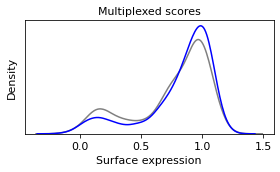

In [15]:
plt.figure(figsize=(4, 2.5))
#plt.hist(hydro_corr_list, color='lightgray', edgecolor='k', bins=16)

sns.distplot(v2R_df_over50_missense['ctrls_comb'], hist=False, color='gray')
sns.distplot(v2R_df_over50_missense['27_comb'], hist=False, color='blue')

plt.xlabel('Surface expression', fontsize=11)
plt.ylabel('Density', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks([], fontsize=11)
plt.title('Multiplexed scores', fontsize=11)
plt.tight_layout()

In [18]:
import statsmodels.api as sm # to build a LOWESS model
import statsmodels.nonparametric.smoothers_lowess
print (statsmodels.__version__)

0.13.2


In [20]:
lowess_fit_27 = lowess(v2R_df_over50_missense['27_comb'].values, \
                        v2R_df_over50_missense['ctrls_comb'].values, \
                        frac=0.3, it=3, delta=0.0, xvals=v2R_df_over50_missense['ctrls_comb'].values, \
                        is_sorted=False, missing='drop', return_sorted=True)

v2R_df_over50_missense['Lowess_27'] = lowess_fit_27
v2R_df_over50_missense['residual_27'] = v2R_df_over50_missense['27_comb'] - v2R_df_over50_missense['Lowess_27']



lowess = sm.nonparametric.lowess
lowess_fit_Tol = lowess(v2R_df_over50_missense['Tol_comb'].values, \
                        v2R_df_over50_missense['ctrls_comb'].values, \
                        frac=0.3, it=3, delta=0.0, xvals=v2R_df_over50_missense['ctrls_comb'].values, \
                        is_sorted=False, missing='drop', return_sorted=True)

v2R_df_over50_missense['Lowess_Tol'] = lowess_fit_Tol
v2R_df_over50_missense['residual_Tol'] = v2R_df_over50_missense['Tol_comb'] - v2R_df_over50_missense['Lowess_Tol']





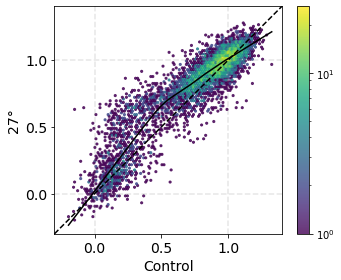

In [24]:
plt.hexbin(v2R_df_over50_missense['ctrls_comb'], v2R_df_over50_missense['27_comb'], bins='log', alpha=0.8)
plt.axhline(y=0, color='gray', linestyle='dashed', alpha=0.2)
plt.axhline(y=1, color='gray', linestyle='dashed', alpha=0.2)
plt.axvline(x=0, color='gray', linestyle='dashed', alpha=0.2)
plt.axvline(x=1, color='gray', linestyle='dashed', alpha=0.2)
plt.xlabel('Control', fontsize=14)
plt.ylabel('27°', fontsize=14)
plt.xticks([0, 0.5, 1], fontsize=14)
plt.yticks([0, 0.5, 1], fontsize=14)

plt.plot(v2R_df_over50_missense.sort_values('ctrls_comb')['ctrls_comb'], \
         v2R_df_over50_missense.sort_values('ctrls_comb')['Lowess_27'], color='k')


plt.xlim(-0.3, 1.4)
plt.ylim(-0.3, 1.4)
plt.plot([-0.3, 1.4], [-0.3, 1.4], color='k', linestyle='dashed')


ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.colorbar(fraction=0.0458, pad=0.04)
plt.tight_layout()

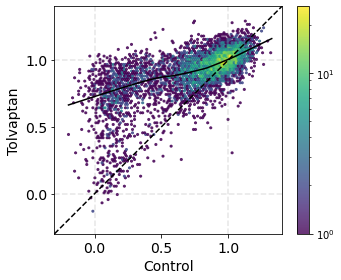

In [25]:
plt.hexbin(v2R_df_over50_missense['ctrls_comb'], v2R_df_over50_missense['Tol_comb'], bins='log', alpha=0.8)
plt.axhline(y=0, color='gray', linestyle='dashed', alpha=0.2)
plt.axhline(y=1, color='gray', linestyle='dashed', alpha=0.2)
plt.axvline(x=0, color='gray', linestyle='dashed', alpha=0.2)
plt.axvline(x=1, color='gray', linestyle='dashed', alpha=0.2)
plt.xlabel('Control', fontsize=14)
plt.ylabel('Tolvaptan', fontsize=14)
plt.xticks([0, 0.5, 1], fontsize=14)
plt.yticks([0, 0.5, 1], fontsize=14)

plt.plot(v2R_df_over50_missense.sort_values('ctrls_comb')['ctrls_comb'], \
         v2R_df_over50_missense.sort_values('ctrls_comb')['Lowess_Tol'], color='k')


plt.xlim(-0.3, 1.4)
plt.ylim(-0.3, 1.4)
plt.plot([-0.3, 1.4], [-0.3, 1.4], color='k', linestyle='dashed')


ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.colorbar(fraction=0.0458, pad=0.04)
plt.tight_layout()

In [50]:
pos_list = []
num_considered = []
pvals = []
average_residual = []
for pos in range(2, 372):
    test_df = v2R_df_over50_missense.loc[(v2R_df_over50_missense['pos'] == pos) & (v2R_df_over50_missense['ctrls_comb'] <= 0.85)]
    compare_df = v2R_df_over50_missense.loc[(v2R_df_over50_missense['pos'] != pos)& (v2R_df_over50_missense['ctrls_comb'] <= 0.85)]
    if len(test_df) > 0:
        pvals.append(scipy.stats.mannwhitneyu(test_df['residual_27'], compare_df['residual_27'], alternative='two-sided', method='asymptotic')[1])
        pos_list.append(pos)
        num_considered.append(len(test_df))
        average_residual.append(np.average(test_df['residual_27']))
    else:
        pvals.append(np.nan)
        pos_list.append(pos)
        num_considered.append(0)
        average_residual.append(np.nan)
comp_df = pd.DataFrame(index=pos_list)
comp_df['num_considered_27'] = num_considered
comp_df['average_residual_27'] = average_residual
comp_df['pval_27'] = pvals

In [51]:
pos_list = []
num_considered = []
pvals = []
average_residual = []
for pos in range(2, 372):
    test_df = v2R_df_over50_missense.loc[(v2R_df_over50_missense['pos'] == pos) & (v2R_df_over50_missense['ctrls_comb'] <= 0.85)]
    compare_df = v2R_df_over50_missense.loc[(v2R_df_over50_missense['pos'] != pos)& (v2R_df_over50_missense['ctrls_comb'] <= 0.85)]
    if len(test_df) > 0:
        pvals.append(scipy.stats.mannwhitneyu(test_df['residual_Tol'], compare_df['residual_Tol'], alternative='two-sided', method='asymptotic')[1])
        pos_list.append(pos)
        num_considered.append(len(test_df))
        average_residual.append(np.average(test_df['residual_Tol']))
    else:
        pvals.append(np.nan)
        pos_list.append(pos)
        num_considered.append(0)
        average_residual.append(np.nan)
        
comp_df['num_considered_Tol'] = num_considered
comp_df['average_residual_Tol'] = average_residual
comp_df['pval_Tol'] = pvals

In [52]:
comp_df_filt = comp_df.dropna().copy()


In [53]:
results = statsmodels.stats.multitest.multipletests(comp_df_filt['pval_Tol'], alpha=0.1, method='fdr_bh', is_sorted=False, returnsorted=False)
comp_df_filt['FDR_bool_Tol'] = results[0]
comp_df_filt['FDR_pval_Tol'] = results[1]

results = statsmodels.stats.multitest.multipletests(comp_df_filt['pval_27'], alpha=0.1, method='fdr_bh', is_sorted=False, returnsorted=False)
comp_df_filt['FDR_bool_27'] = results[0]
comp_df_filt['FDR_pval_27'] = results[1]


In [54]:
comp_df_filt['FDR_pval_Tol-log10'] = -np.log10(comp_df_filt['FDR_pval_Tol'])
comp_df_filt['FDR_pval_27-log10'] = -np.log10(comp_df_filt['FDR_pval_27'])


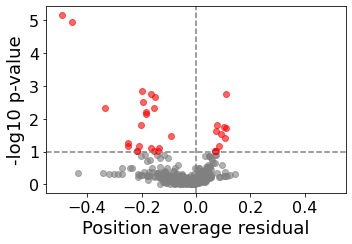

In [55]:
plt.figure(figsize=(5, 3.5))
sig = comp_df_filt.loc[comp_df_filt['FDR_bool_Tol'] == True]
non_sig = comp_df_filt.loc[comp_df_filt['FDR_bool_Tol'] == False]
plt.plot(non_sig['average_residual_Tol'], non_sig['FDR_pval_Tol-log10'], marker='o', color='gray', alpha=0.6, linestyle='None')
plt.plot(sig['average_residual_Tol'], sig['FDR_pval_Tol-log10'], marker='o', color='red', alpha=0.6, linestyle='None')
plt.xlabel('Position average residual', fontsize=18)
plt.ylabel('-log10 p-value', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y = 1, linestyle='dashed', color='gray')
plt.axvline(x = 0, linestyle='dashed', color='gray')

plt.xlim(-0.55, 0.55)
plt.tight_layout()

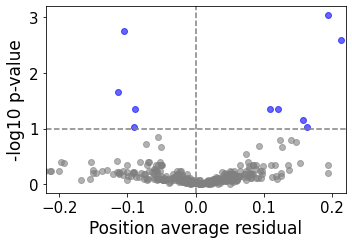

In [56]:
plt.figure(figsize=(5, 3.5))

sig = comp_df_filt.loc[comp_df_filt['FDR_bool_27'] == True]
non_sig = comp_df_filt.loc[comp_df_filt['FDR_bool_27'] == False]
plt.plot(non_sig['average_residual_27'], non_sig['FDR_pval_27-log10'], marker='o', color='gray', alpha=0.6, linestyle='None')
plt.plot(sig['average_residual_27'], sig['FDR_pval_27-log10'], marker='o', color='blue', alpha=0.6, linestyle='None')
plt.xlabel('Position average residual', fontsize=17)
plt.ylabel('-log10 p-value', fontsize=17)
plt.xticks([-0.2, -0.1, 0, 0.1, 0.2], fontsize=15)
plt.yticks([0, 1, 2, 3], fontsize=15)
plt.axhline(y = 1, linestyle='dashed', color='gray')
plt.axvline(x = 0, linestyle='dashed', color='gray')

plt.xlim(-0.22, 0.22)
plt.tight_layout()

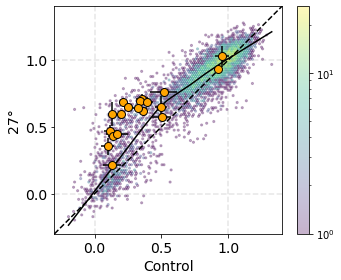

In [28]:
plt.hexbin(v2R_df_over50_missense['ctrls_comb'], v2R_df_over50_missense['27_comb'], bins='log', alpha=0.3)
plt.axhline(y=0, color='gray', linestyle='dashed', alpha=0.2)
plt.axhline(y=1, color='gray', linestyle='dashed', alpha=0.2)
plt.axvline(x=0, color='gray', linestyle='dashed', alpha=0.2)
plt.axvline(x=1, color='gray', linestyle='dashed', alpha=0.2)
plt.xlabel('Control', fontsize=14)
plt.ylabel('27°', fontsize=14)
plt.yticks([0, 0.5, 1], fontsize=14)
plt.xticks([0, 0.5, 1], fontsize=14)

plt.xlim(-0.3, 1.4)
plt.ylim(-0.3, 1.4)
plt.plot([-0.3, 1.4], [-0.3, 1.4], color='k', linestyle='dashed')

plt.plot(v2R_df_over50_missense.sort_values('ctrls_comb')['ctrls_comb'], \
         v2R_df_over50_missense.sort_values('ctrls_comb')['Lowess_27'], color='k')

sel_df = v2R_df_over50_missense.loc[v2R_df_over50_missense['pos'] == 296]

DMSO_vals = sel_df['ctrls_comb']
Tol_vals = sel_df['27_comb']
label = sel_df['mut_aa']

#for index_pos in range(0, len(DMSO_vals)):
#    plt.annotate(label[index_pos], (DMSO_vals[index_pos], Tol_vals[index_pos]), fontsize=12, fontweight='bold')


plt.errorbar(sel_df['ctrls_comb'], sel_df['27_comb'], \
             color='black',marker='o',markerfacecolor='orange',linestyle='None', markersize=8,\
            yerr=sel_df['Tol_sem'], xerr=sel_df['ctrls_sem'], alpha=1)



ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.colorbar(fraction=0.0458, pad=0.04)
plt.tight_layout()

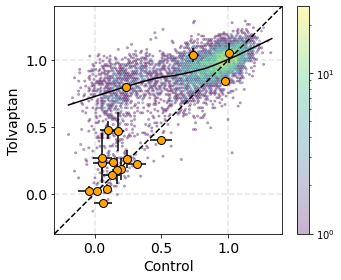

In [29]:
plt.hexbin(v2R_df_over50_missense['ctrls_comb'], v2R_df_over50_missense['Tol_comb'], bins='log', alpha=0.3)
plt.axhline(y=0, color='gray', linestyle='dashed', alpha=0.2)
plt.axhline(y=1, color='gray', linestyle='dashed', alpha=0.2)
plt.axvline(x=0, color='gray', linestyle='dashed', alpha=0.2)
plt.axvline(x=1, color='gray', linestyle='dashed', alpha=0.2)
plt.xlabel('Control', fontsize=14)
plt.ylabel('Tolvaptan', fontsize=14)
plt.yticks([0, 0.5, 1], fontsize=14)
plt.xticks([0, 0.5, 1], fontsize=14)

plt.xlim(-0.3, 1.4)
plt.ylim(-0.3, 1.4)
plt.plot([-0.3, 1.4], [-0.3, 1.4], color='k', linestyle='dashed')

plt.plot(v2R_df_over50_missense.sort_values('ctrls_comb')['ctrls_comb'], \
         v2R_df_over50_missense.sort_values('ctrls_comb')['Lowess_Tol'], color='k')

sel_df = v2R_df_over50_missense.loc[v2R_df_over50_missense['pos'] == 171]

DMSO_vals = sel_df['ctrls_comb']
Tol_vals = sel_df['Tol_comb']
label = sel_df['mut_aa']

#for index_pos in range(0, len(DMSO_vals)):
#    plt.annotate(label[index_pos], (DMSO_vals[index_pos], Tol_vals[index_pos]), fontsize=12, fontweight='bold')


plt.errorbar(sel_df['ctrls_comb'], sel_df['Tol_comb'], \
             color='black',marker='o',markerfacecolor='orange',linestyle='None', markersize=8,\
            yerr=sel_df['Tol_sem'], xerr=sel_df['ctrls_sem'], alpha=1)


ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.colorbar(fraction=0.0458, pad=0.04)
plt.tight_layout()

In [30]:
NDI_df = v2R_df_over50_missense.loc[v2R_df_over50_missense['HGMD'] == 'NDI']
clinical_category_df = pd.DataFrame(index=['Strongly destabilizing', 'Moderately destabilizing', 'Stable'])

clinical_category_df['Control'] = [len(NDI_df.loc[NDI_df['ctrls_comb'] < 0.35]) / len(NDI_df['ctrls_comb']), \
                                 len(NDI_df.loc[(NDI_df['ctrls_comb'] >= 0.35) & (NDI_df['ctrls_comb'] < 0.8)]) / len(NDI_df['ctrls_comb']), \
                                 len(NDI_df.loc[NDI_df['ctrls_comb'] > 0.8])/ len(NDI_df['ctrls_comb'])]

clinical_category_df['Tolvaptan'] = [len(NDI_df.loc[NDI_df['Tol_comb'] < 0.35]) / len(NDI_df['Tol_comb']), \
                                 len(NDI_df.loc[(NDI_df['Tol_comb'] >= 0.35) & (NDI_df['Tol_comb'] < 0.8)]) / len(NDI_df['Tol_comb']), \
                                 len(NDI_df.loc[NDI_df['Tol_comb'] > 0.8])/ len(NDI_df['Tol_comb'])]

clinical_category_df['27°'] = [len(NDI_df.loc[NDI_df['27_comb'] < 0.35]) / len(NDI_df['27_comb']), \
                                 len(NDI_df.loc[(NDI_df['27_comb'] >= 0.35) & (NDI_df['27_comb'] < 0.8)]) / len(NDI_df['27_comb']), \
                                 len(NDI_df.loc[NDI_df['27_comb'] > 0.8])/ len(NDI_df['27_comb'])]

clinical_category_df['Cmpd34'] = [len(NDI_df.loc[NDI_df['cmpd34_comb'] < 0.35]) / len(NDI_df['cmpd34_comb']), \
                                 len(NDI_df.loc[(NDI_df['cmpd34_comb'] >= 0.35) & (NDI_df['cmpd34_comb'] < 0.8)]) / len(NDI_df['cmpd34_comb']), \
                                 len(NDI_df.loc[NDI_df['cmpd34_comb'] > 0.8])/ len(NDI_df['cmpd34_comb'])]

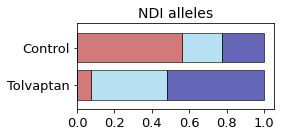

In [32]:
clinical_category_df[['Tolvaptan', 'Control']].T.plot.barh(stacked=True, legend=False, color=['firebrick', 'skyblue', 'darkblue'], \
                                edgecolor='k', alpha=0.6,width=0.8,figsize=(4, 2))



#plt.ylabel('Fraction', fontsize=14)
plt.title('NDI alleles', fontsize=14)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13)
#plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()

In [33]:
AM_patho_df = v2R_df_over50_missense.loc[v2R_df_over50_missense['alpha_missense'] > 0.564]
clinical_category_df = pd.DataFrame(index=['Strongly destabilizing', 'Moderately destabilizing', 'Stable'])

clinical_category_df['Control'] = [len(AM_patho_df.loc[AM_patho_df['ctrls_comb'] < 0.35]) / len(AM_patho_df['ctrls_comb']), \
                                 len(AM_patho_df.loc[(AM_patho_df['ctrls_comb'] >= 0.35) & (AM_patho_df['ctrls_comb'] < 0.8)]) / len(AM_patho_df['ctrls_comb']), \
                                 len(AM_patho_df.loc[AM_patho_df['ctrls_comb'] > 0.8])/ len(AM_patho_df['ctrls_comb'])]

clinical_category_df['Tolvaptan'] = [len(AM_patho_df.loc[AM_patho_df['Tol_comb'] < 0.35]) / len(AM_patho_df['Tol_comb']), \
                                 len(AM_patho_df.loc[(AM_patho_df['Tol_comb'] >= 0.35) & (AM_patho_df['Tol_comb'] < 0.8)]) / len(AM_patho_df['Tol_comb']), \
                                 len(AM_patho_df.loc[AM_patho_df['Tol_comb'] > 0.8])/ len(AM_patho_df['Tol_comb'])]


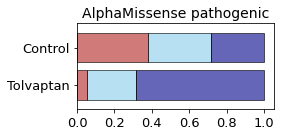

In [34]:
clinical_category_df[['Tolvaptan','Control']].T.plot.barh(stacked=True, legend=False, color=['firebrick', 'skyblue', 'darkblue'], \
                                edgecolor='k', alpha=0.6,width=0.8,figsize=(4, 2))



#plt.ylabel('Fraction', fontsize=14)
plt.title('AlphaMissense pathogenic', fontsize=14)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13)
#plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()

In [35]:
print (len(AM_patho_df))
print (len(AM_patho_df.loc[AM_patho_df['ctrls_comb'] < 0.35]))
print (len(AM_patho_df.loc[(AM_patho_df['ctrls_comb'] < 0.35) & (AM_patho_df['Tol_comb'] > 0.35)]))

2555
965
835


In [36]:
print (len(v2R_df_over50_missense))
print (len(v2R_df_over50_missense.loc[v2R_df_over50_missense['ctrls_comb'] <= 0.35]))
print (len(v2R_df_over50_missense.loc[(v2R_df_over50_missense['ctrls_comb'] < 0.35) & (v2R_df_over50_missense['Tol_comb'] > 0.35)]))

6098
1010
879


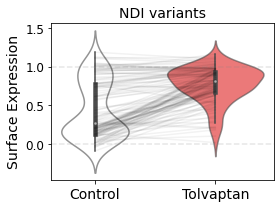

In [38]:
plt.figure(figsize=(4, 3))

NDI_Tol_df = v2R_df_over50_missense.loc[v2R_df_over50_missense['HGMD'] == 'NDI'][['ctrls_comb', 'Tol_comb']].copy()


#plt.scatter(np.zeros(len(befores)), befores, alpha=0.5)
#plt.scatter(np.ones(len(afters)), afters, alpha=0.5)
my_pal = {'ctrls_comb': 'white', 'Tol_comb': 'red'}

ax = sns.violinplot(data = NDI_Tol_df, palette=my_pal)
plt.setp(ax.collections, alpha=0.6)


for i in range(len(NDI_Tol_df)):
    #plt.plot( [0,1], [befores[i], afters[i]], c='k', alpha=0.2)
    plt.plot([0, 1], [float (NDI_Tol_df.iloc[i]['ctrls_comb']) , float(NDI_Tol_df.iloc[i]['Tol_comb'])], \
            c='k', alpha=0.05)
    
    
plt.xticks([0,1], ['Control', 'Tolvaptan'], fontsize=14)
plt.yticks(fontsize=12)
plt.title('NDI variants', fontsize=14)

plt.ylabel('Surface Expression', fontsize=14)
plt.axhline(y=0, linestyle='dashed', color='gray', alpha=0.2)
plt.axhline(y=1, linestyle='dashed', color='gray', alpha=0.2)

plt.tight_layout()


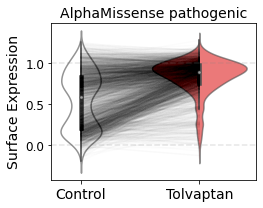

In [39]:
plt.figure(figsize=(4, 3))

AM_patho_Tol_df = AM_patho_df[['ctrls_comb', 'Tol_comb']].copy()


#plt.scatter(np.zeros(len(befores)), befores, alpha=0.5)
#plt.scatter(np.ones(len(afters)), afters, alpha=0.5)
my_pal = {'ctrls_comb': 'white', 'Tol_comb': 'red'}

ax = sns.violinplot(data = AM_patho_Tol_df, palette=my_pal)
plt.setp(ax.collections, alpha=0.6)


for i in range(len(AM_patho_Tol_df)):
    #plt.plot( [0,1], [befores[i], afters[i]], c='k', alpha=0.2)
    plt.plot([0, 1], [float (AM_patho_Tol_df.iloc[i]['ctrls_comb']) , float(AM_patho_Tol_df.iloc[i]['Tol_comb'])], \
            c='k', alpha=0.01)
    
    
plt.xticks([0,1], ['Control', 'Tolvaptan'], fontsize=14)
plt.yticks(fontsize=12)
plt.title('AlphaMissense pathogenic', fontsize=14)

plt.ylabel('Surface Expression', fontsize=14)
plt.axhline(y=0, linestyle='dashed', color='gray', alpha=0.2)
plt.axhline(y=1, linestyle='dashed', color='gray', alpha=0.2)

plt.tight_layout()


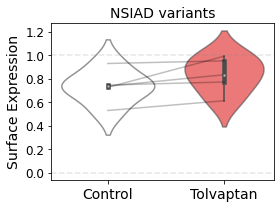

In [40]:
plt.figure(figsize=(4, 3))

NSIAD_Tol_df = v2R_df_over50_missense.loc[v2R_df_over50_missense['HGMD'] == 'NSIAD'][['ctrls_comb', 'Tol_comb']].copy()


#plt.scatter(np.zeros(len(befores)), befores, alpha=0.5)
#plt.scatter(np.ones(len(afters)), afters, alpha=0.5)
my_pal = {'ctrls_comb': 'white', 'Tol_comb': 'red'}

ax = sns.violinplot(data = NSIAD_Tol_df, palette=my_pal)
plt.setp(ax.collections, alpha=0.6)


for i in range(len(NSIAD_Tol_df)):
    #plt.plot( [0,1], [befores[i], afters[i]], c='k', alpha=0.2)
    plt.plot([0, 1], [float (NSIAD_Tol_df.iloc[i]['ctrls_comb']) , float(NSIAD_Tol_df.iloc[i]['Tol_comb'])], \
            c='k', alpha=0.25)
    
    
plt.xticks([0,1], ['Control', 'Tolvaptan'], fontsize=14)
plt.yticks(fontsize=12)
plt.title('NSIAD variants', fontsize=14)

plt.ylabel('Surface Expression', fontsize=14)
plt.axhline(y=0, linestyle='dashed', color='gray', alpha=0.2)
plt.axhline(y=1, linestyle='dashed', color='gray', alpha=0.2)

plt.tight_layout()

In [57]:
validation_vars = [ 'L336S', 'L336R', 'L336G', 'Y205G', 'Y205D', 'P144V', 'P144H', 'V332Y', 'V332G', 'V332W']
validation_df = pd.DataFrame(index=validation_vars)

Tol_indiv_scores = [3596,4203,3478,1077,1834,3959,5850,3865,4608,6071]
validation_df['Tol_indiv'] = Tol_indiv_scores


In [58]:
Tol_DMS_scores = []
Tol_DMS_sems = []
for var in validation_df.index:
    Tol_DMS_scores.append(v2R_df_over50_missense.loc[var]['Tol_comb'])
    Tol_DMS_sems.append(v2R_df_over50_missense.loc[var]['Tol_sem'])
validation_df['Tol_DMS_scores'] = Tol_DMS_scores
validation_df['Tol_DMS_sems'] = Tol_DMS_sems


In [59]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(validation_df['Tol_indiv'],validation_df['Tol_DMS_scores'])
yfit = [intercept + slope * xi for xi in validation_df['Tol_indiv']]
print (scipy.stats.pearsonr(validation_df['Tol_indiv'],validation_df['Tol_DMS_scores']))

(0.8546761101786557, 0.0016312001794164179)


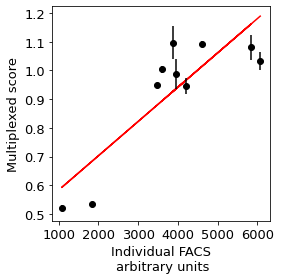

In [60]:
plt.figure(figsize=(4, 4))

plt.plot(validation_df['Tol_indiv'], yfit, color='red')


plt.errorbar(validation_df['Tol_indiv'], validation_df['Tol_DMS_scores'], \
             marker='o', linestyle='None', color='k', \
            yerr=validation_df['Tol_DMS_sems'], alpha=1)


plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Individual FACS\n arbitrary units', fontsize=13)
plt.ylabel('Multiplexed score', fontsize=13)
plt.tight_layout()